In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import glob

In [9]:

x = cv2.imread("../asserts/2/"+str(i)+".bmp",x)


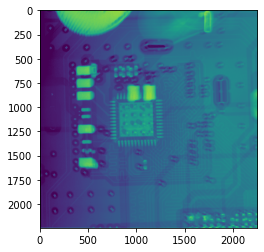

In [2]:
img=cv2.imread('DATA.jpeg',0)
IMGH,IMGW=img.shape
plt.imshow(img)

In [3]:
VX=500
VY=500
VZ=200
RATIO = IMGH/VX

In [4]:
a=-30
tana = -0.5773502691896257
z_min = -100
b = (360/64)*0
index_map = np.zeros((VZ,VX,2))

for z in range(VZ):
    z_i = z + z_min
    x_off = z_i * tana * np.cos(b*math.pi/180)
    y_off = z_i * tana * np.sin(b*math.pi/180)
    index_map[z,:,0]=np.linspace(0,VX,VX)*RATIO + x_off
    index_map[z,:,1]=np.linspace(0,VX,VX)*RATIO + y_off
    index_map[index_map<0]=0
    index_map[index_map>IMGH-1]=0

In [5]:
mapx = np.zeros((VX,VY))
mapy = np.zeros((VX,VY))

In [ ]:
for z in range(VZ):
    for i in range(VX):
        for j in range(VY):
            mapx[i,j] = index_map[]

In [17]:
%%time
voxel_space = np.zeros((VX,VY,VZ))
for z in range(VZ):
    img1=img[index_map[z,:,0].astype(np.int),:]
    voxel_space[0:VX,0:VY,z] =img1[:,index_map[z,:,0].astype(np.int)]

CPU times: user 213 ms, sys: 153 ms, total: 366 ms
Wall time: 365 ms


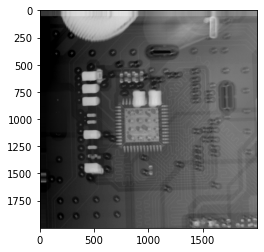

In [12]:
plt.imshow(voxel_space[:,:,199],cmap='gray')

In [13]:
voxel_space_gpu = torch.Tensor(voxel_space).cuda()
img_gpu = torch.Tensor(img).cuda()
index_map_gpu = torch.Tensor(index_map).cuda()

In [14]:
%%timeit
for z in range(VZ):
    tmp=img_gpu[index_map_gpu[z,:,0].long(),:]
    voxel_space_gpu[0:VX,0:VY,z] =tmp[:,index_map_gpu[z,:,0].long()]

345 ms ± 3.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
